In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [16]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
outcome                     0
dtype: int64


In [13]:
X = df.drop('outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
y = df['outcome']
y

,outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
X_train.shape, X_test.shape

((230, 8), (538, 8))

In [9]:
import time
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(
    random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)
start_time = time.time()
classifier_rf.fit(X_train, y_train)
end_time = time.time()
print(f"Training completed in {end_time - start_time:.4f} seconds")


Training completed in 0.2463 seconds


In [24]:
input_values = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]]
prediction = classifier_rf.predict(input_values)
prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [25]:
if prediction[0] == 0:
    print("The model predicts that the person does not have diabetes.")
else:
    print("The model predicts that the person has diabetes.")

The model predicts that the person has diabetes.


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = classifier_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[304  45]
 [ 79 110]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       349
           1       0.71      0.58      0.64       189

    accuracy                           0.77       538
   macro avg       0.75      0.73      0.74       538
weighted avg       0.76      0.77      0.76       538



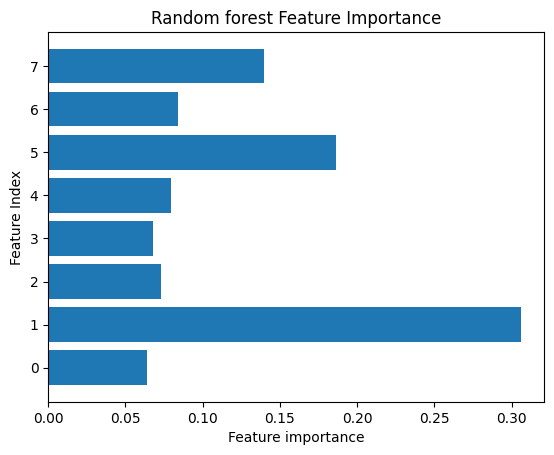

In [11]:
import matplotlib.pyplot as plt
importances = classifier_rf.feature_importances_
plt.barh(range(len(importances)), importances)
plt.xlabel('Feature importance')
plt.ylabel('Feature Index')
plt.title('Random forest Feature Importance')
plt.show()

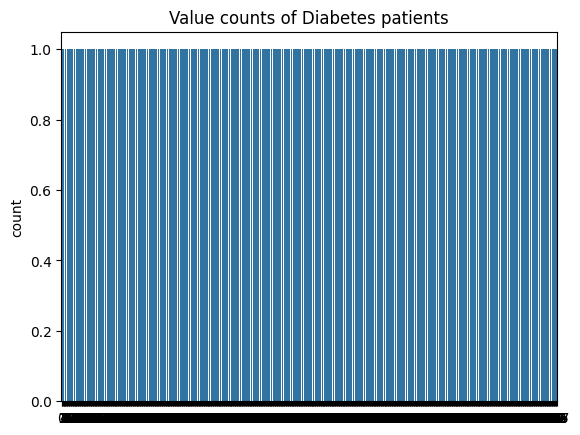

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot(df['outcome'])
plt.title('Value counts of Diabetes patients')
plt.show()